## Regresión logística para predicciones bancarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/datasets/bank/bank.csv", sep = ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape

(4119, 21)

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
# convierto los datos de la columna Y a booleana
data["y"] = (data["y"]=="yes").astype(int)

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [7]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
data["education"] = np.where(data["education"] == "basic.9y", "Basic",data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic",data["education"])
data["education"] = np.where(data["education"] == "basic.4y", "Basic",data["education"])

data["education"] = np.where(data["education"] == "high.school", "High School",data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional Course",data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree",data["education"])

data["education"] = np.where(data["education"] == "illiterate", "Illiterate",data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown",data["education"])

In [9]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [10]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [11]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


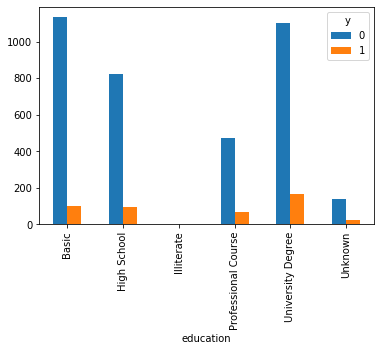

In [13]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")

Text(0.5, 0, 'Proporción de clientes')

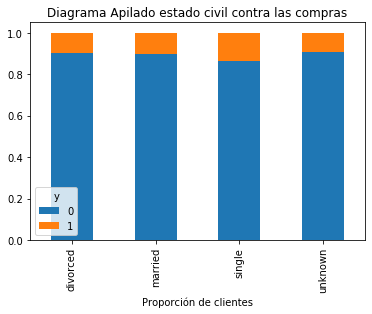

In [14]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Diagrama Apilado estado civil contra las compras")
plt.xlabel("Estado Civil")
plt.xlabel("Proporción de clientes")

Text(0.5, 0, 'Frecuencia de compra del producto')

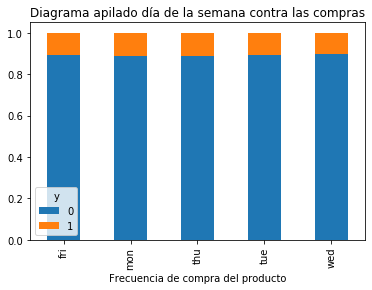

In [15]:
%matplotlib inline
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True)
plt.title("Diagrama apilado día de la semana contra las compras")
plt.xlabel("Día de la semana")
plt.xlabel("Frecuencia de compra del producto")

Text(0.5, 0, 'Frecuencia de compra del producto')

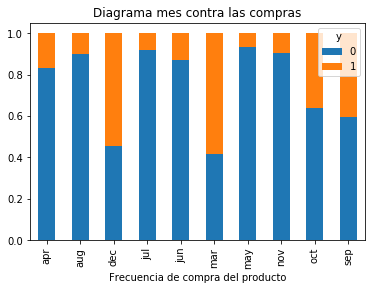

In [16]:
%matplotlib inline
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True)
plt.title("Diagrama mes contra las compras")
plt.xlabel("Mes")
plt.xlabel("Frecuencia de compra del producto")

Text(0.5, 0, 'Frecuencia de compra del producto')

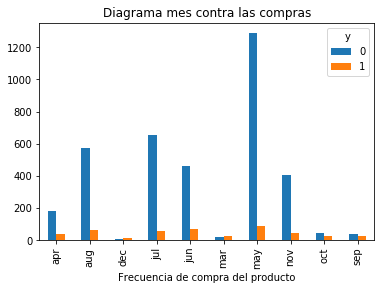

In [17]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Diagrama mes contra las compras")
plt.xlabel("Mes")
plt.xlabel("Frecuencia de compra del producto")

Text(0.5, 0, 'Cliente')

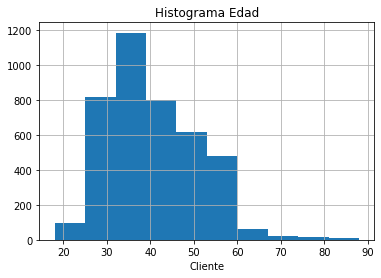

In [18]:
%matplotlib inline
data.age.hist()
plt.title("Histograma Edad")
plt.xlabel("Edad")
plt.xlabel("Cliente")

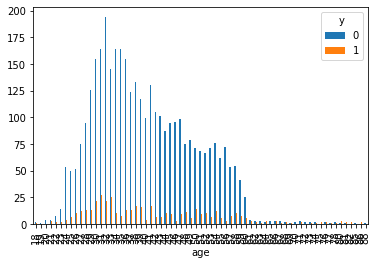

In [19]:
pd.crosstab(data.age, data.y).plot(kind="bar")

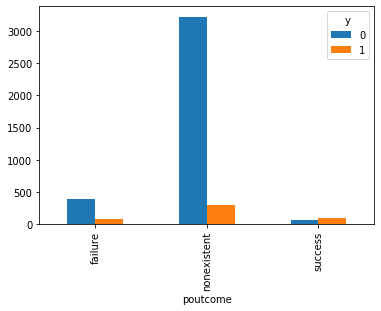

In [20]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

## Conversión de variables categóricas a dummies

In [21]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [23]:
categories = ["job", "marital", "education","housing","loan", "contact", "month", "day_of_week", "poutcome"]


In [24]:
# Convierto as variables categoricas en dummies
for category in categories:
    cat_list = "cat"+"_"+category
    cat_dummies = pd.get_dummies(data[category], prefix = cat_list)
    data_new = data.join(cat_dummies)
    data = data_new

In [25]:
data_vars = data.columns.values.tolist()
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'cat_job_admin.', 'cat_job_blue-collar', 'cat_job_entrepreneur',
       'cat_job_housemaid', 'cat_job_management', 'cat_job_retired',
       'cat_job_self-employed', 'cat_job_services', 'cat_job_student',
       'cat_job_technician', 'cat_job_unemployed', 'cat_job_unknown',
       'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Illiterate',
       'cat_education_Professional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr',
       'cat_month_aug', 'cat_month_dec', 'cat_month_jul', 'cat_mon

In [26]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y'] 
X = [v for v in bank_data_vars if v not in Y]

## Selección de rasgos para el modelo

In [27]:
n = 12

In [28]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
# al no colocar la variable solver me pedía hacerlo con solver = lbfgs, sin embargo, al hacerlo me pedía aumentar el número de iteraciones
# Así q decidí usar la liblinear
lr = LogisticRegression(solver='liblinear')

In [30]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [31]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]


In [32]:
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.21.2


In [33]:
print(rfe.ranking_)

[34 41 18 42  1 14 27 25  1 38 22  3  1 35  2 36  1  5 30 33 12 45 19 40
 31 47 26 13 46 21 32  8 20  6 10 15  9 23 16  4 43 24  1  1  1  1  1 17
  1 44 37 28 39 29 11  1  7  1]


In [34]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)

In [35]:
list(z)

[('age', False, 34),
 ('duration', False, 41),
 ('campaign', False, 18),
 ('pdays', False, 42),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 38),
 ('y', False, 22),
 ('cat_job_admin.', False, 3),
 ('cat_job_blue-collar', True, 1),
 ('cat_job_entrepreneur', False, 35),
 ('cat_job_housemaid', False, 2),
 ('cat_job_management', False, 36),
 ('cat_job_retired', True, 1),
 ('cat_job_self-employed', False, 5),
 ('cat_job_services', False, 30),
 ('cat_job_student', False, 33),
 ('cat_job_technician', False, 12),
 ('cat_job_unemployed', False, 45),
 ('cat_job_unknown', False, 19),
 ('cat_marital_divorced', False, 40),
 ('cat_marital_married', False, 31),
 ('cat_marital_single', False, 47),
 ('cat_marital_unknown', False, 26),
 ('cat_education_Basic', False, 13),
 ('cat_education_High School', False, 46),
 ('cat_education_Illiterate', False, 21),
 ('cat_education_Professional

In [36]:
cols = ["previous","euribor3m","cat_job_blue-collar","cat_job_retired","cat_month_aug","cat_month_dec",
        "cat_month_jul","cat_month_jun","cat_month_mar","cat_month_nov","cat_day_of_week_wed","cat_poutcome_nonexistent"]

In [37]:
X = bank_data[cols]
Y = bank_data[Y]

## Implementación del modelo en Python con statsmodel.api

In [38]:
import statsmodels.api as sm

In [39]:
logit_model = sm.Logit(Y, X)

In [40]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [41]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.155     
Dependent Variable:     y                  AIC:                2427.6025 
Date:                   2020-05-05 18:33   BIC:                2503.4828 
No. Observations:       4119               Log-Likelihood:     -1201.8   
Df Model:               11                 LL-Null:            -1422.9   
Df Residuals:           4107               LLR p-value:        6.4492e-88
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
previous                 -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m                -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
cat_job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
cat_job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
cat_month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
cat_month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
cat_month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
cat_month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
cat_month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
cat_month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
cat_day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
cat_poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=========================================================================

"""

## Implementación del modelo en Python con scikit-learn

In [42]:
from sklearn import linear_model

In [43]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
logit_model.score(X,Y)

0.8963340616654528

In [45]:
1-Y.mean()

y    0.890507
dtype: float64

In [46]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5076571355273206]
1,euribor3m,[-0.5464961313057572]
2,cat_job_blue-collar,[-0.3591553621281814]
3,cat_job_retired,[0.3560383888064367]
4,cat_month_aug,[0.6253983087108934]
5,cat_month_dec,[1.1822172986023802]
6,cat_month_jul,[0.9622633628545498]
7,cat_month_jun,[1.054317924948264]
8,cat_month_mar,[1.6306366297925368]
9,cat_month_nov,[0.45195768187309615]


In [47]:
X.columns

Index(['previous', 'euribor3m', 'cat_job_blue-collar', 'cat_job_retired',
       'cat_month_aug', 'cat_month_dec', 'cat_month_jul', 'cat_month_jun',
       'cat_month_mar', 'cat_month_nov', 'cat_day_of_week_wed',
       'cat_poutcome_nonexistent'],
      dtype='object')

In [48]:
logit_model.coef_

array([[ 0.50765714, -0.54649613, -0.35915536,  0.35603839,  0.62539831,
         1.1822173 ,  0.96226336,  1.05431792,  1.63063663,  0.45195768,
         0.04171434,  0.30569877]])

## Validación del modelo logistico

In [49]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [51]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
from IPython.display import display, Math, Latex

In [53]:
display(Math(r'y_p= \begin{cases}0& si\ p\leq0,5\\1&si\ p > 0.5 \end{cases}'))

<IPython.core.display.Math object>

In [54]:
probs = lm.predict_proba(X_test)

In [55]:
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [56]:
prediction = lm.predict(X_test)

In [57]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
display(Math(r'\varepsilon\in (0,1)=y_p= \begin{cases}0& si\ p\leq \varepsilon\\1&si\ p > \varepsilon \end{cases}'))

<IPython.core.display.Math object>

In [59]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1,0)

In [60]:
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [61]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [62]:
390 / len(prob_df)*100

31.55339805825243

In [63]:
# Cambiando el threshold
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1,0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,905
1,331


In [64]:
331 / len(prob_df)*100

26.779935275080906

In [65]:
# Cambiando el threshold
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1,0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [66]:
732 / len(prob_df)*100

59.22330097087378

In [67]:
from sklearn import metrics

In [68]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

## Validación cruzada

In [69]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

In [70]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=8)

C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\linear_

In [71]:
scores

array([0.89922481, 0.89728682, 0.89922481, 0.90485437, 0.88910506,
       0.88910506, 0.90077821, 0.88521401])

In [72]:
scores.mean()

0.8955991422088645

## Matrices de confusión y curvas ROC

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [74]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
probs = lm.predict_proba(X_test)

In [76]:
prob = probs[:,1]


In [77]:
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
# el list Y test tuvimos que hacerlo porque el Y_test se queda con los identificadores antiguos entonces al agregarlo al DF no calzan
Y_test_list= list(Y_test["y"])
prob_df["actual"] = Y_test_list
prob_df.head()

,0,prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0


In [78]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [79]:
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [80]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

In [81]:
sens = TP /(TP + FN)
sens

0.6721311475409836

In [82]:
espc_1 = 1 - TN /(TN+FP)
espc_1

0.2764811490125674

In [83]:
threshold = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]
for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>t, 1, 0)
    # el list Y test tuvimos que hacerlo porque el Y_test se queda con los identificadores antiguos entonces al agregarlo al DF no calzan
    Y_test_list= list(Y_test["y"])
    prob_df["actual"] = Y_test_list
    prob_df.head()
    
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sens = TP /(TP + FN)
    sensitivities.append(sens)
    espc_1 = 1 - TN /(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [84]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6475409836065574,
 0.5163934426229508,
 0.45901639344262296,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.11475409836065574,
 0]

In [85]:
especifities_1

[1,
 0.7782764811490126,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.22621184919210058,
 0.12387791741472176,
 0.1077199281867145,
 0.07181328545780974,
 0.06463195691202872,
 0.02333931777378817,
 0.013464991023339312,
 0]

Text(0.5, 1.0, 'Curva ROC')

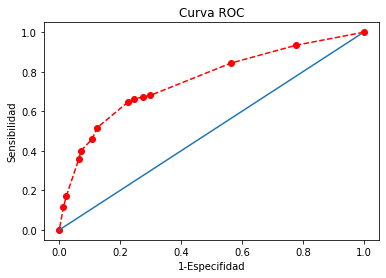

In [86]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle='--', color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [87]:
from sklearn import metrics
from ggplot import *

In [94]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [117]:
df = pd.DataFrame({
        "espc" : espc_1,
        "sens" : sensit
})

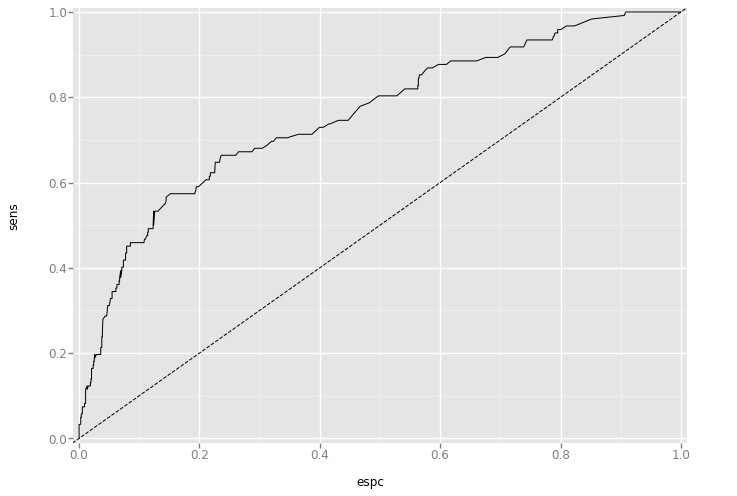

<ggplot: (-9223371927283548100)>

In [112]:
ggplot(df, aes(x="espc", y ="sens"))+ geom_line() +geom_abline(linetype="dashed")+xlim(-0.01, 1.01)+ylim(-0.01,1.01)

In [115]:
auc = metrics.auc(espc_1, sensit)
auc

0.7575712982311564

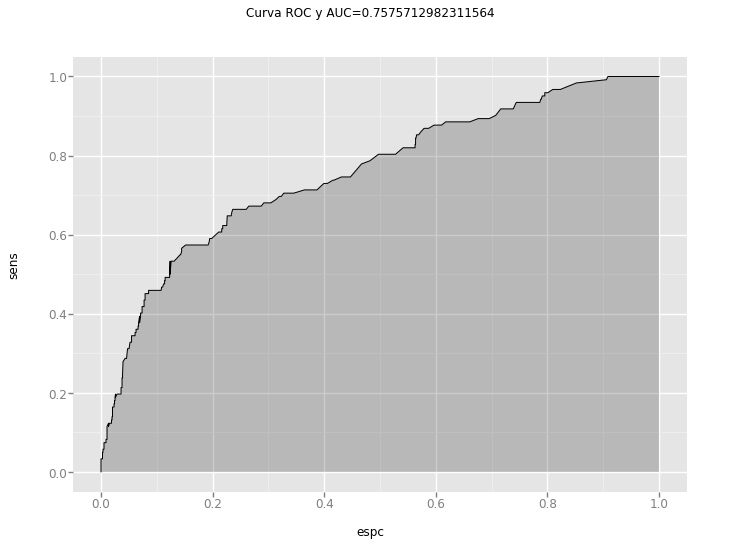

<ggplot: (109574159196)>

In [121]:
ggplot(df, aes(x="espc", y ="sens")) + geom_area(alpha=0.25) + geom_line(aes(y="sens"))+ ggtitle("Curva ROC y AUC=%s" % str(auc))